Exercise Sheet 5 **Ion Channels**

**1. Potassium Channel**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
## 1a

#defining our transition rate from close to open
def a(V):
    return .01*(V+55)/(1-np.e**(-.1*(V+55)))

#...and from open to closed
def b(V):
    return .125*np.e**(-.0125*(V+65))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


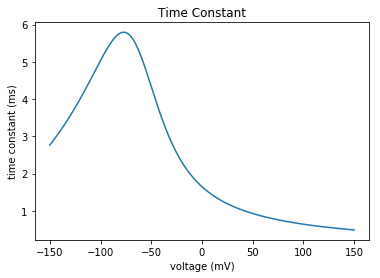

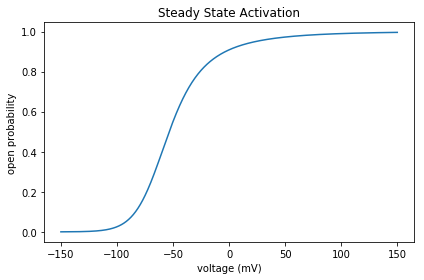

In [3]:
## 1b

#defining our time 'constant' and steady state activation
def tau(V):
    return 1/(a(V)+b(V))

def n_inf(V):
    return a(V)/(a(V)+b(V))

dt = 1/1000
Ek = -77 #mV
gk = 36e-6 #in milliSiemens
V = np.linspace(-150,150,1/dt) # mV
t = 0

plt.plot(V,tau(V))
plt.xlabel('voltage (mV)')
plt.ylabel('time constant (ms)')
plt.title('Time Constant')

plt.figure()
plt.plot(V,(n_inf(V)))
plt.xlabel('voltage (mV)')
plt.ylabel('open probability')
plt.title('Steady State Activation')

plt.tight_layout()
plt.show()

In [4]:
def euler(dxdt, x0, tstop, dt):
    # func is the first derivative of x(t) wrt t
    # x0 is the value of x(t) at t = 0
    steps = int(tstop/dt)
    x = np.empty(steps)
    x[0] = x0
    
    for i in range(steps-1):
        x[i+1] = x[i] + dxdt(x[i])*dt
        
    return x

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


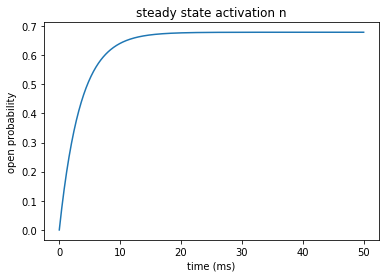

In [5]:
## 1b

#Defining the gate probability closing as a function of n,

# voltage set at -40mV
def dndt(n):
    return a(-40)*(1-n) - b(-40)*n

# Setting up variables for euler solution
#Defining time as 50 ms, steady state n with probability of .68, and
# keeping the same dt
tmax = 50 #ms
n0 = 0 #probability
dt = 1/10 #time step

#defining the euler soluton to our ODE, as a function of steady state
euler_n = euler(dndt,n0,tmax,dt)

#defining out time to be plottable
time = np.linspace(0,tmax,tmax/dt,endpoint=True)

plt.plot(time,euler_n)
plt.xlabel('time (ms)')
plt.ylabel('open probability')
plt.title('steady state activation n')
plt.show()

In [6]:
print('Steady state n =', euler_n[-1])
s23 = int(23/dt)
print('At 23ms, n reaches', euler_n[s23])

Steady state n = 0.6785905974833454
At 23ms, n reaches 0.6777033290236479


From this experiment, we see that the probability of all gates being open monotonically increases with voltage and the time constant is largest at the reversal potential of the membrane. So, we learn that the potassium current is predicted to bring the membrane potential closer to the Nernst potential of potassium. 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


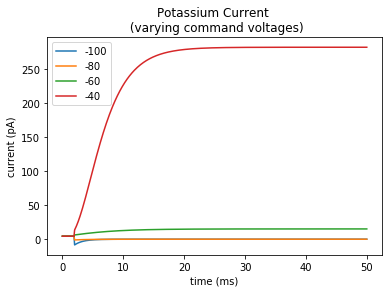

In [7]:
## 1c

#defining our initial condition
n0 = .3177

#integrating over 0 - 2ms
def dndt(n):
    return a(-65)*(1-n) - b(-65)*n
n1 = euler(dndt,n0,2,dt) # 2ms

#setting command voltage
Vc = np.array((-100,-80,-60,-40))

for j in range(len(Vc)):
    
    #integrating dndt from 2 - tmax ms, based on command voltage
    def dndt(n):
        return a(Vc[j])*(1-n) - b(Vc[j])*n
    n2 = euler(dndt,n1[-1],tmax-2,dt) #reducing tmax by 2ms

    #concatenating arrays
    n = np.concatenate((n1,n2))

    #defining voltage, taking array as input
    def V(t):
        time = np.linspace(0,t,t/dt,endpoint=True)
        v = np.empty_like(time)
        for i,x in enumerate(time):
            if time[i] > 2:
                v[i] = Vc[j]
            else:
                v[i] = -65
        return v

    volt = V(tmax)

    Ik = gk*(volt-Ek)*n**4

    #And for each command voltage, plot a figure!
    plt.plot(time,Ik/1e-6,label = Vc[j])
    
plt.xlabel('time (ms)')
plt.ylabel('current (pA)')
plt.title('Potassium Current \n (varying command voltages)')
plt.legend()
plt.show()  

From this experiment, we see that for all command voltages higher than the membrane potential, the potassium current as t approaches infinity is exponentially higher even with a small increase in the command voltage. As the voltage moves away from the membrane potential, in either direction, the time constant decreases, which means voltage current changes happen more slowly. We see this from the current reaching a saturation plateau in all cases.

In [8]:
def dndt(n):
        return a(volt[0])*(1-n) - b(volt[0])*n
n_inst = euler(dndt,n0,tmax,dt)

In [9]:
n_ss = euler(dndt,n_inst[-1],tmax,dt)

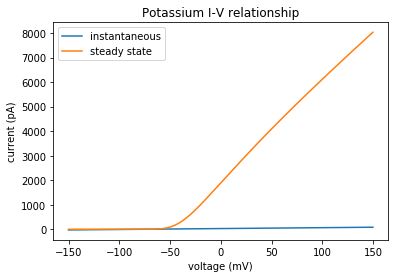

In [10]:
## 1d

#changing our dt so calculations don't take forever
dt = 1/10

#our range of voltages
volt = np.arange(-150,150,dt) # mV

#instataneous case (t=0)
Ik_inst = gk*(volt-Ek)*n0**4

#preallocating array to hold steady state values
Ik_ss =np.empty_like(volt)

#Defining potassium current in Hodgkin-Huxley model as function of voltage
for i,x in enumerate(volt):
    
    def dndt(n):
        return a(volt[i])*(1-n) - b(volt[i])*n
    n = euler(dndt,n0,tmax,dt)
    
    # and the steady state (t=tmax) case.
    Ik_ss[i] = gk*(volt[i]-Ek)*n[-1]**4

plt.plot(volt, Ik_inst/1e-6,label = 'instantaneous')
# plt.xlabel('voltage (mV)')
# plt.ylabel('current (pA)')
# plt.title('Potassium I-V relationship')
# plt.legend()

# plt.figure()
plt.plot(volt, Ik_ss/1e-6,label = 'steady state')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.title('Potassium I-V relationship')
plt.legend()
plt.show()

**2. Sodium Ion Channel**

In [11]:
## 2a

#time constant
def tau(V,a,b):
    return 1/(a(V)+b(V))

#steady state
def ss(V,a,b):
    return a(V)/(a(V)+b(V))

#Redifining rate function for potassium gating variable n,
#from closed to open...
def an(V):
    return .01*(V+55)/(1-np.e**(-.1*(V+55)))

#...and from open to closed.
def bn(V):
    return .125*np.e**(-.0125*(V+65))

#Defining rate function for sodium gating variable m...
def am(V):
    return .1*(V+40)/(1-np.e**(-.1*(V+40)))

def bm(V):
    return 4*np.e**(-.0556*(V+65))

#...and variable h.
def ah(V):
    return .07*np.e**(-.05*(V+65))

def bh(V):
    return 1/(1+np.e**(-.1*(V+35)))


In [12]:
v = np.linspace(-150,150,10000,endpoint=True)

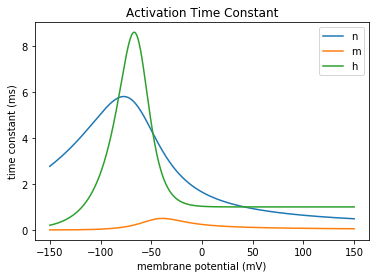

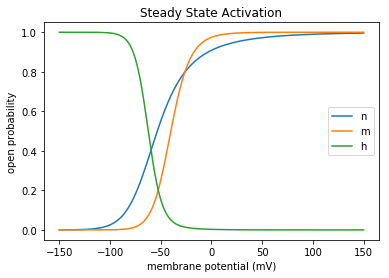

In [13]:
plt.plot(v,tau(v,an,bn),label = 'n')
plt.plot(v,tau(v,am,bm),label = 'm')
plt.plot(v,tau(v,ah,bh),label = 'h')
plt.xlabel('membrane potential (mV)')
plt.ylabel('time constant (ms)')
plt.title('Activation Time Constant')
plt.legend()

plt.figure()
plt.plot(v,(ss(v,an,bn)),label = 'n')
plt.plot(v,(ss(v,am,bm)),label = 'm')
plt.plot(v,(ss(v,ah,bh)),label = 'h')
plt.xlabel('membrane potential (mV)')
plt.ylabel('open probability')
plt.title('Steady State Activation')
plt.legend()

# plt.labels('n','m','h')
# plt.legend()

plt.show()

Depolarization activates variable m and n, while variable h is deinactivated by depolarization. h has the fastest change of any variable, (which can be seen by the high time constant and its rapid growth/decay) while n changes at a slower rate, and m changes een slower still.

In [14]:
## 2b

# Setting up variables for euler solution
dt = 1/1000 #one one-thousandth of a millisecond
Ena = 50 #mV
gna = 120e-6 #milliSiemens
m0 = .0529 
h0 = .5961 

#redefining the gate probability closing as a function of each activation 
# variable
def dmdt(m):
    return am(-20)*(1-m) - bm(-20)*m

def dhdt(h):
    return ah(-20)*(1-h) - bh(-20)*h

#defining the euler solutions to our ODEs, a function of each steady state
h = euler(dhdt,h0,tmax,dt)
m = euler(dmdt,m0,tmax,dt)

#getting our current
Ina = (-20-Ena)*gna*h*m**3

In [15]:
#checking our values are right...they are!
print('Our minumum current is',min(Ina)/1e-6,'pA')
print('Our current at 15ms is', Ina[15000]/1e-6,'pA')

Our minumum current is -1239.2303835547104 pA
Our current at 15ms is -50.499348537265206 pA


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


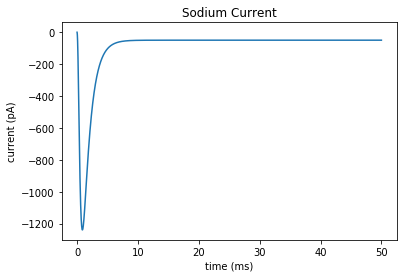

In [16]:
#defining our time to be plottable
time = np.linspace(0,tmax,tmax/dt,endpoint=True)

#changing scale to picoamperes
plt.plot(time,Ina/(1e-6))
plt.xlabel('time (ms)')
plt.ylabel('current (pA)')
plt.title('Sodium Current')
plt.show()

In [17]:
#2c
#Simulating voltage clamp scenario (voltage is clamped after 2 ms)


#integrating separately over each of two voltage conditions. First, 0-2ms
def dmdt(m):
    return am(-65)*(1-m) - bm(-65)*m

def dhdt(h):
    return ah(-65)*(1-h) - bh(-65)*h

m1 = euler(dmdt,m0,2,dt) 
h1 = euler(dhdt,h0,2,dt)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


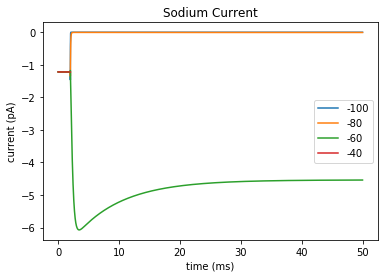

In [18]:
plt.figure()

for j in range(len(Vc)):
    
    #defining voltage for specific command voltage
    def V(t):
        t = np.arange(0,t,dt)
        v = np.empty_like(t)
        for i,x in enumerate(t):
            if t[i] > 2:
                v[i] = Vc[j]
            else:
                v[i] = -65
        return v
    
    #defining all voltages over tmax (50) seconds
    volt = V(tmax)
    
    #Redefining dmdt and dhdt using command voltage
    def dmdt(m):
        return am(Vc[j])*(1-m) - bm(Vc[j])*m
    
    def dhdt(h):
        return ah(Vc[j])*(1-h) - bh(Vc[j])*h
    
    #ensuring we have real values for our integration
    assert(m1[-1] > 0)
    assert(h1[-1] > 0)
      
    # Now integrating over 2-tmax ms, using the last value of the first
    # voltage condition as the starting value
    m2 = euler(dmdt,m1[-1],tmax-2,dt)
    h2 = euler(dhdt,h1[-1],tmax-2,dt)

    #concatenating arrays
    m = np.concatenate((m1,m2))
    h = np.concatenate((h1,h2))
    
    #Defining sodium current in Hodgkin-Huxley model
    Ina = (volt-Ena)*gna*h*m**3
    
    #And for each command voltage, plot a figure!
    plt.plot(time,Ina/(1e-6),label = Vc[j])
    
plt.xlabel('time (ms)')
plt.ylabel('current (pA)')
plt.title('Sodium Current')
plt.legend()
plt.show()  

In [19]:
print(m2)
print(h2)

#for some reason, m2 giving me nan after the initial condition...

[0.05293248        nan        nan ...        nan        nan        nan]
[0.59610434 0.59588739 0.59567052 ... 0.0504415  0.0504415  0.0504415 ]


The responsible mechanisms for the sodium current are the probabilities of the ion gates, as represented by the activation varibles m and h. Biologically, these can be represented by two mechanisms that open and close channels that lets ions pass. In turn, they are a function of voltage, so ultimately the current is dependent on the voltage of the membrane. The voltage barrier prevents ions from crossing the gate, so when the current peaks, it is during some time period when both m and h both reach their highest simultaneous values. This can be understood when one realizes m and h have inversely proportionate dependencies to voltage (as seen in 2a), so when the probability of one voltage-dependent gate being open is close to 1, the other is close to 0, and vice versa.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in true_divide


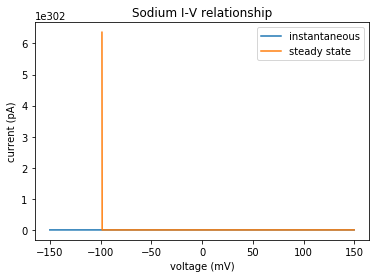

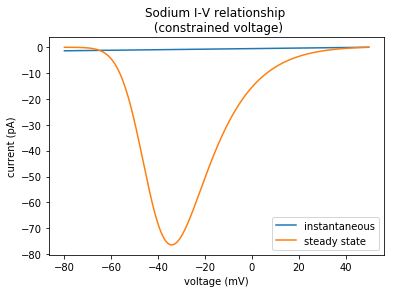

In [20]:
## 2d

#redefining our time variables
dt = 1/10
volt = np.arange(-150,150,dt) # mV


#Defining sodim current in Hodgkin-Huxley model as function of voltage,
# in the instantaneous (t=0) case...
Ina_inst = (volt-Ena)*gna*h0*m0**3

#preallocating array to hold steady state values
Ina_ss = np.empty_like(volt)

#Defining potassium current in Hodgkin-Huxley model as function of voltage
for i,x in enumerate(volt):
    
    def dmdt(m):
        return am(volt[i])*(1-m) - bm(volt[i])*m
    
    def dhdt(h):
        return ah(volt[i])*(1-h) - bh(volt[i])*h
    
    h = euler(dhdt,h0,tmax,dt)
    m = euler(dmdt,m0,tmax,dt)
    
    # and the steady state (t=tmax) case.
    Ina_ss[i] = (volt[i]-Ena)*gna*h[-1]*m[-1]**3

# plt.subplot(1,2,1)
plt.plot(volt, Ina_inst/1e-6, label = 'instantaneous')
# plt.xlabel('voltage (mV)')
# plt.ylabel('current (pA)')
# plt.title('Sodium I-V relationship')
# plt.legend()

# plt.subplot(1,2,2)
plt.plot(volt, Ina_ss/1e-6, label = 'steady state')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.title('Sodium I-V relationship')
plt.legend()


#plotting with more constrained voltages
plt.figure()
plt.plot(volt[700:2000], Ina_inst[700:2000]/1e-6, label = 'instantaneous')
# plt.xlabel('voltage (mV)')
# plt.ylabel('current (pA)')
# plt.title('Sodium I-V relationship')

plt.plot(volt[700:2000], Ina_ss[700:2000]/1e-6, label = 'steady state')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.title('Sodium I-V relationship \n (constrained voltage)')
plt.legend()

At volatage values less than -100mV, the steady state current seems to diverge, reaching very high values. When the voltage is equal to the reversal potential of sodium or higher, there is no current flow. In 1d, there is no steady state current flow once the voltage goes below the reversal potential of potassium (-77mV), and it seems to diverge to high values (but not as high as sodium's current) at ~-50mV. The sodium current prefers voltages less than sodium's reveral potential, while potassium current prefers voltages more than its reversal potential. For both 1d and 2d, the instantaneous currrent increases linearly as a function of voltage.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


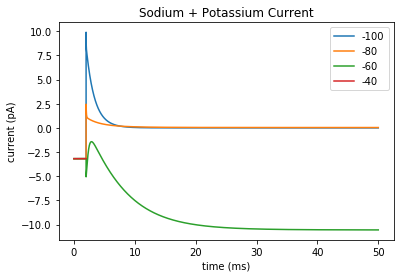

In [21]:
## 2e
## Repeating voltage clamp conditions with both potassium and sodium current

dt = 1/1000
tmax = 50
time = np.arange(dt,tmax+dt,dt)

#integrating separately over each of two voltage conditions. First, 0-2ms
def dmdt(m):
    return am(-65)*(1-m) - bm(-65)*m

def dhdt(h):
    return ah(-65)*(1-h) - bh(-65)*h

def dndt(n):
        return an(-65)*(1-n) - bn(-65)*n

m1 = euler(dmdt,m0,2,dt) 
h1 = euler(dhdt,h0,2,dt)
n1 = euler(dndt,n0,2,dt)

for j in range(len(Vc)):
    
    #defining voltage for specific command voltage
    def V(t):
        t = np.arange(0,t,dt)
        v = np.empty_like(t)
        for i,x in enumerate(t):
            if t[i] > 2:
                v[i] = Vc[j]
            else:
                v[i] = -65
        return v
  
    #Now integrating over , 2 - tmax ms, using command voltage
    def dmdt(m):
        return am(Vc[j])*(1-m) - bm(Vc[j])*m
    
    def dhdt(h):
        return ah(Vc[j])*(1-h) - bh(Vc[j])*h
      
    def dndt(n):
        return a(Vc[j])*(1-n) - b(Vc[j])*n

    m2 = euler(dmdt,m1[-1],tmax-2,dt)
    h2 = euler(dhdt,h1[-1],tmax-2,dt)
    n2 = euler(dndt,n1[-1],tmax-2,dt)  
    
    #concatenating arrays
    m = np.concatenate((m1,m2))
    h = np.concatenate((h1,h2))
    n = np.concatenate((n1,n2))

    volt = V(tmax)
    Ina = (volt-Ena)*gna*h*m**3
    Ik = gk*(volt-Ek)*n**4
    
    I_total = -Ina-Ik
    
    #And for each command voltage, plot a figure!
    plt.plot(time,I_total/(1e-6),label = Vc[j])
    
plt.xlabel('time (ms)')
plt.ylabel('current (pA)')
plt.title('Sodium + Potassium Current')
plt.legend()
plt.show()  


This ideally represents relates to neural activity by showing us a simplified version of an action potential. Biologically, this would look like an influx of sodium ions, followed by a potassium ion influx, leading to a sudden change in the membrane voltage. In turn, the membrane would try to reach its resting potential by releasing sodim and potassium ions back into the extracellular space. This is modeled here by the decaying current after the initial spike.